# IDO Zoning

In [49]:
import geopandas as gpd
import contextily as ctx

In [39]:
gpd.list_layers('data/IDOZoning.zip')

,name,geometry_type
0,IDOZoning,Polygon


In [40]:
IDOZoning = gpd.read_file('data/IDOZoning.zip').to_crs(4267)
IDOZoning.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16046 entries, 0 to 16045
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    16046 non-null  int64         
 1   IDOZoneDis  16046 non-null  object        
 2   IDODistric  16046 non-null  object        
 3   IDOZoningD  621 non-null    object        
 4   IDOCategor  16046 non-null  object        
 5   LastUpdate  16044 non-null  datetime64[ms]
 6   OldZoningD  15421 non-null  object        
 7   OldZonin_1  6530 non-null   object        
 8   OldZoningC  16046 non-null  object        
 9   IDOUseTabl  15464 non-null  object        
 10  created_us  2563 non-null   object        
 11  created_da  2563 non-null   datetime64[ms]
 12  last_edite  16046 non-null  object        
 13  last_edi_1  16046 non-null  datetime64[ms]
 14  STAr        16046 non-null  float64       
 15  STLe        16046 non-null  float64       
 16  geometry    16

In [41]:
drops = [
    'STLe', 'STAr', 'last_edi_1', 'last_edite', 
    'created_da', 'created_us', 'LastUpdate'
]
IDOZoning.drop(columns=drops, inplace=True)

In [42]:
print(IDOZoning.iloc[::4000])

       OBJECTID IDOZoneDis                 IDODistric IDOZoningD  \
0          9592       R-1C  Single-Family (Large Lot)       None   
4000       6985       R-1C  Single-Family (Large Lot)       None   
8000       7751        R-T                  Townhouse       None   
12000     12723       MX-M         Moderate Intensity       None   
16000     15155         PC          Planned Community       None   

                IDOCategor OldZoningD  \
0              Residential        R-1   
4000           Residential        R-1   
8000           Residential       SU-2   
12000            Mixed-Use       SU-1   
16000  Planned Development         PC   

                                           OldZonin_1              OldZoningC  \
0                                                None             RESIDENTIAL   
4000                                             None             RESIDENTIAL   
8000                                              RTD             RESIDENTIAL   
12000  FOR VILLAGE S

In [43]:
print(f'{IDOZoning.iloc[3100]}\n{IDOZoning.iloc[10274]}')

OBJECTID                                                   6409
IDOZoneDis                                                 R-ML
IDODistric                             Multi-family Low Density
IDOZoningD                                                 None
IDOCategor                                          Residential
OldZoningD                                                 SU-2
OldZonin_1                                                  MFR
OldZoningC                                          RESIDENTIAL
IDOUseTabl    https://documents.cabq.gov/planning/agis/IDO/U...
geometry      POLYGON ((-106.66263367971688 35.0871996920760...
Name: 3100, dtype: object
OBJECTID                                                  12609
IDOZoneDis                                                 UNCL
IDODistric                                       Not Classified
IDOZoningD                                                DITCH
IDOCategor                                       Not Classified
OldZoningD    

In [45]:
renames = dict(
    IDOZoneDis = 'IDOZoneCode', 
    IDOCategor = 'IDOCategory',
    IDODistric = 'IDOZoneDescription', 
    IDOZoningD = 'IDOZoneDescription2', 
    OldZoningD = 'OldZoneCode', 
    OldZoningC = 'OldZoneDescription', 
    OldZonin_1 = 'OldZoneDescription2', 
)
IDOZoning.rename(columns=renames, inplace=True)

In [46]:
IDOZoning.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16046 entries, 0 to 16045
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             16046 non-null  int64   
 1   IDOZoneCode          16046 non-null  object  
 2   IDOZoneDescription   16046 non-null  object  
 3   IDOZoneDescription2  621 non-null    object  
 4   IDOCategory          16046 non-null  object  
 5   OldZoneCode          15421 non-null  object  
 6   OldZoneDescription2  6530 non-null   object  
 7   OldZoneDescription   16046 non-null  object  
 8   IDOUseTabl           15464 non-null  object  
 9   geometry             16046 non-null  geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 1.2+ MB


In [56]:
IDOZoning.to_file('../../../data/local/abq_city_data.gpkg', 
                 layer='idozoning')
IDOZoning.to_file('../../../localData/City/IDOZoning.gpkg')

In [47]:
IDOZoning.IDOCategory.unique()

array(['Residential', 'Non-Residential', 'Mixed-Use',
       'Planned Development', 'Not Classified'], dtype=object)

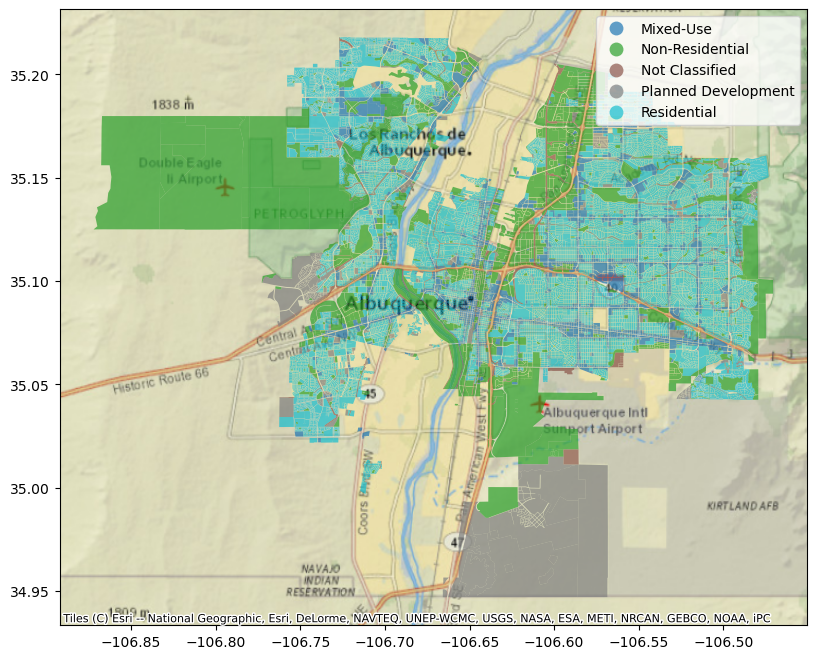

In [51]:
ax = IDOZoning.plot(column='IDOCategory', 
                    figsize=(10,8),
                    alpha=0.7, legend=True)
ctx.add_basemap(ax, crs=IDOZoning.crs, 
                source=ctx.providers.Esri.NatGeoWorldMap);

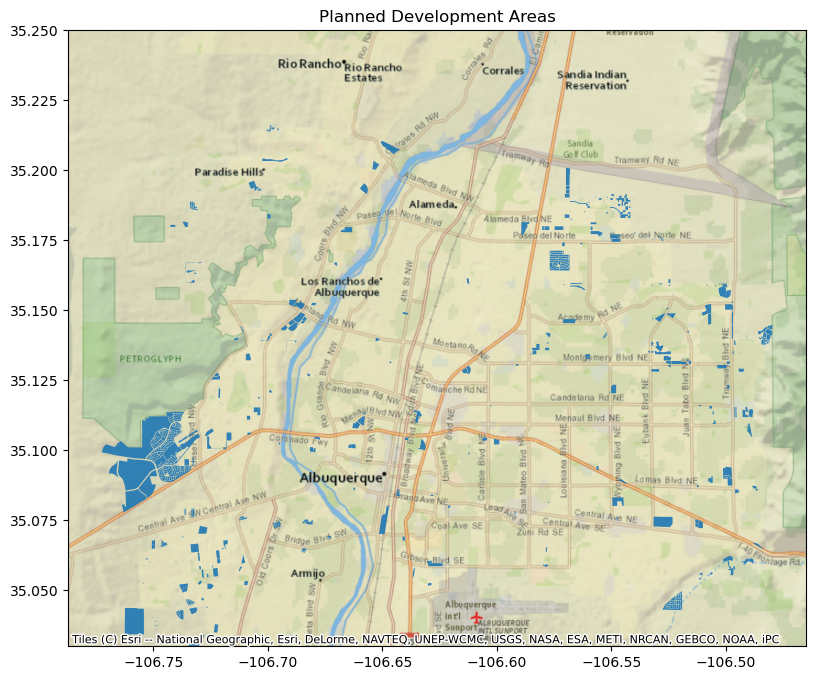

In [55]:
ax = IDOZoning.loc[IDOZoning.IDOCategory == 'Planned Development'].plot(figsize=(10,8),
                    alpha=0.9, legend=True)
ax.set_ylim(35.03, 35.25)
ax.set_title('Planned Development Areas')
ctx.add_basemap(ax, crs=IDOZoning.crs, 
                source=ctx.providers.Esri.NatGeoWorldMap);